<a href="https://colab.research.google.com/github/TraoAnTan/Final_AI/blob/main/Final_Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist 
from tensorflow.keras.layers import   Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Normalization,LeakyReLU, BatchNormalization
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import cv2 as cv
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
print(os.listdir('/content/drive/MyDrive/data_AI_Final/data2/raw-img'))

['scoiattolo', 'gatto', 'farfalla', 'mucca', 'elefante', 'cavallo', 'gallina', 'ragno', 'pecora', 'cane']


In [ ]:
def save_data(root_folder):


    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    # Lặp qua các thư mục con con trong thư mục gốc
    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            # Lặp qua các file trong từng thư mục con  chứa các ảnh
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    # print("File=", file)
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=(224, 224)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/data_AI_Final/data2/raw-img.data','wb')
    # dump information to that file
    pickle.dump((images,labels), file)
    # close the file
    file.close()

save_data('//content/drive/MyDrive/data_AI_Final/data2/raw-img')

Bắt đầu xử lý ảnh...
Folder = scoiattolo
Folder = gatto
Folder = farfalla
Folder = mucca
Folder = elefante
Folder = cavallo
Folder = gallina
Folder = ragno
Folder = pecora
Folder = cane
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/data_AI_Final/data2/raw-img.data','rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(4551, 224, 224, 3)
(4551, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 5)
X = X_test
X_train.shape
X_test.shape

(911, 224, 224, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization(-1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(-1))
model.add(Dense(256, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [ ]:
tan = ImageDataGenerator(rotation_range=15,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )

In [ ]:
h = model.fit_generator(tan.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test,y_test))

<ipython-input-7-9a48cf9185c4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(tan.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test,y_test))


Epoch 1/20
114/114 [==============================] - 43s 378ms/step - loss: 0.9101 - accuracy: 0.6907 - val_loss: 2.0770 - val_accuracy: 0.4676
Epoch 2/20
114/114 [==============================] - 41s 361ms/step - loss: 0.8936 - accuracy: 0.6970 - val_loss: 1.1911 - val_accuracy: 0.6103
Epoch 3/20
114/114 [==============================] - 42s 368ms/step - loss: 0.8298 - accuracy: 0.7132 - val_loss: 2.0804 - val_accuracy: 0.4742
Epoch 4/20
114/114 [==============================] - 42s 368ms/step - loss: 0.7951 - accuracy: 0.7283 - val_loss: 1.7979 - val_accuracy: 0.5401
Epoch 5/20
114/114 [==============================] - 41s 361ms/step - loss: 0.7625 - accuracy: 0.7415 - val_loss: 1.2572 - val_accuracy: 0.6180
Epoch 6/20
114/114 [==============================] - 41s 356ms/step - loss: 0.7168 - accuracy: 0.7637 - val_loss: 1.2300 - val_accuracy: 0.6312
Epoch 7/20
114/114 [==============================] - 40s 354ms/step - loss: 0.6798 - accuracy: 0.7637 - val_loss: 1.8703 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/data_AI_Final/data2/model2.h5')

['cane' 'cavallo' 'elefante' 'farfalla' 'gallina' 'gatto' 'mucca' 'pecora'
 'ragno' 'scoiattolo']


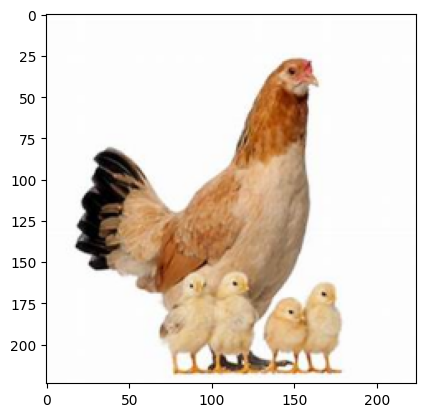

1/1 [==============================] - 0s 34ms/step
[[1.2780862e-01 9.8134123e-04 1.2876521e-07 1.1868308e-02 6.2456363e-01
  2.3445553e-01 1.0507471e-04 5.0145525e-07 3.8015003e-06 2.1305091e-04]]
This picture is:  gallina [1.2780862e-01 9.8134123e-04 1.2876521e-07 1.1868308e-02 6.2456363e-01
 2.3445553e-01 1.0507471e-04 5.0145525e-07 3.8015003e-06 2.1305091e-04]


In [ ]:
from numpy.ma.core import sort
class_name = ['scoiattolo', 'gatto', 'farfalla', 'mucca', 'elefante', 'cavallo', 'gallina', 'ragno', 'pecora', 'cane']
class_name = sort(class_name)
print(class_name)

image = X[258]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[258]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
# print(np.max(result[0],axis=0))